In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
import yaml
import torch 
sys.path.append('../../Ex6') 
sys.path.append('../../Ex6/GAN')
from GAN.trajectory_gan import TrajectoryGAN

## Load GAN model

In [6]:
# Load the trained GAN model

# Read config file
config_file = '../GAN/config/config.yaml'
stream = open(config_file)
conf = yaml.load(stream, Loader=yaml.FullLoader)

gan = TrajectoryGAN(conf)

gan.load_model('../GAN/trained_models/LargeDataset/trajectory-gan_400.pt')

loading from ../GAN/trained_models/LargeDataset/trajectory-gan_400.pt


## Evaluate GAN

loaded 100 data points
loaded 200 data points
loaded 300 data points
loaded 400 data points
(499, 20, 2)


<ipython-input-28-48e2893db829>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-28-48e2893db829>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-28-48e2893db829>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


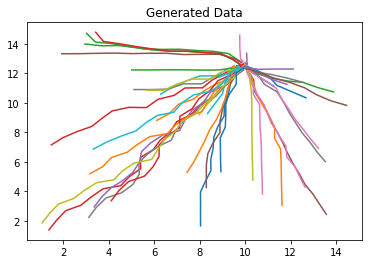

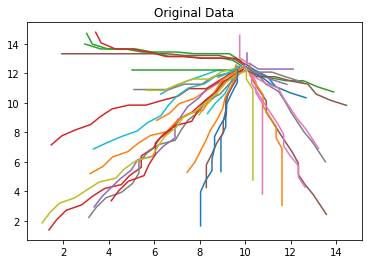

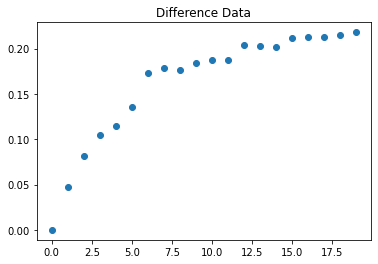

In [28]:
# Generate a number of trajectories from the distribution learnt by the generator
data, steps = gan.readData("/../TrainingData_v2.0/TrajArr", False)
data = data[:40, :, :]
n_samples = len(data)
data_start = data[-n_samples:, 0, :]
data = data[-n_samples:, :, :]
#trajectories = gan.generate(torch.FloatTensor([[3, 2], [4, 3], [2, 2]]), n_samples, 5)
trajectories = gan.generate(torch.from_numpy(data_start).float(), n_samples, steps)
diff = np.empty_like(data[:,:,0])
fig = plt.figure()
for i in range(n_samples):
    plt.plot(trajectories[i, :, 0], trajectories[i, :, 1])
    for j in range(steps):
        diff[i,j] = np.sqrt((trajectories[i, j, 0] - data[i,j,0])**2 + (trajectories[i, j, 1] - data[i,j,1])**2)
plt.title("Generated Data")
fig.show()
fig = plt.figure()
for i in range(n_samples):
    plt.plot(data[i, :, 0], data[i, :, 1])
plt.title("Original Data")
fig.show()
avg = np.mean(diff, axis = 0)
fig = plt.figure()
step = [j for j in range(steps)]
print(step)
plt.scatter(step, avg)
plt.title("Difference Data")
fig.show()

